<a href="https://colab.research.google.com/github/longhtt/Education/blob/main/DATA_3320_Education_Analysis_Long_Tran_Thien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The purpose of this notebook is so make an analysis from the clean data set created from the prepration notebook. the main goal of this analysis is to ee if we can predict ACT scores from socioeconomic factors. 

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

# Import additional libraries
import missingno as msno

from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import Axes3D

import statsmodels.formula.api as smf
from mpl_toolkits import mplot3d
from matplotlib import cm

from sklearn import linear_model, tree
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

from vega_datasets import data

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 
# set the plotting style 
sns.set_style("whitegrid")

# plot tree model
import graphviz

# Plot missing values
import missingno as msno

# Model preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Train-test splits
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

# Models
from sklearn import linear_model, tree
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

# Imputation
from sklearn.impute import KNNImputer
#from fancyimpute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

import statsmodels.api as sm

from itertools import combinations
#from math import comb

## Load clean data

##### $\rightarrow$ Load the clean data set from Github. 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/longhtt/Education/main/clean_education_inequality_data.csv')

##### $\rightarrow$ Review the contents of the data set.

In [4]:
df

,median_income,percent_college,percent_lunch,percent_married,rate_unemployment,school_level,school_type,state,year,zip_code,average_act
0,52833.0,0.564717,0.226481,0.823245,0.100518,High,Regular School,MI,2016-2017,49112,21.000000
1,62411.0,0.537197,0.677895,0.313253,0.095582,High,Regular School,NY,2016-2017,11413,16.245421
2,63938.0,0.781818,0.561431,0.523810,0.096433,High,Regular School,PA,2016-2017,15222,18.345543
3,25625.0,0.361014,0.625239,0.317358,0.168471,High,Regular School,NY,2016-2017,11103,18.663004
4,46350.0,0.602669,0.358377,0.641444,0.089737,High,Regular School,KY,2016-2017,42025,20.000000
...,...,...,...,...,...,...,...,...,...,...,...
1441,33879.0,0.518481,0.784543,0.230473,0.158721,High,Regular School,OH,2016-2017,44870,20.000000
1442,46136.0,0.673419,0.269076,0.614195,0.058028,High,Regular School,WA,2016-2017,98506,23.156288
1443,77351.0,0.740656,0.204893,0.786031,0.036417,High,Regular School,IN,2016-2017,46069,20.885226
1444,37155.0,0.527434,0.434183,0.515067,0.177820,High,Regular School,WI,2016-2017,53144,20.500000


## State your questions

The overall problem is to determine whether and how average school ACT performance is related to socioeconomic factors. To answer this general problem, you will need to ask specific questions about the data.


1. what variable(s) has the greatest correlation with average_act? 
2. to what degree are other variables other than average_act have an effect on each other
3. how well are we pridicting the average_act and what is pridicting the average_act
4. what is the best model

## Analysis

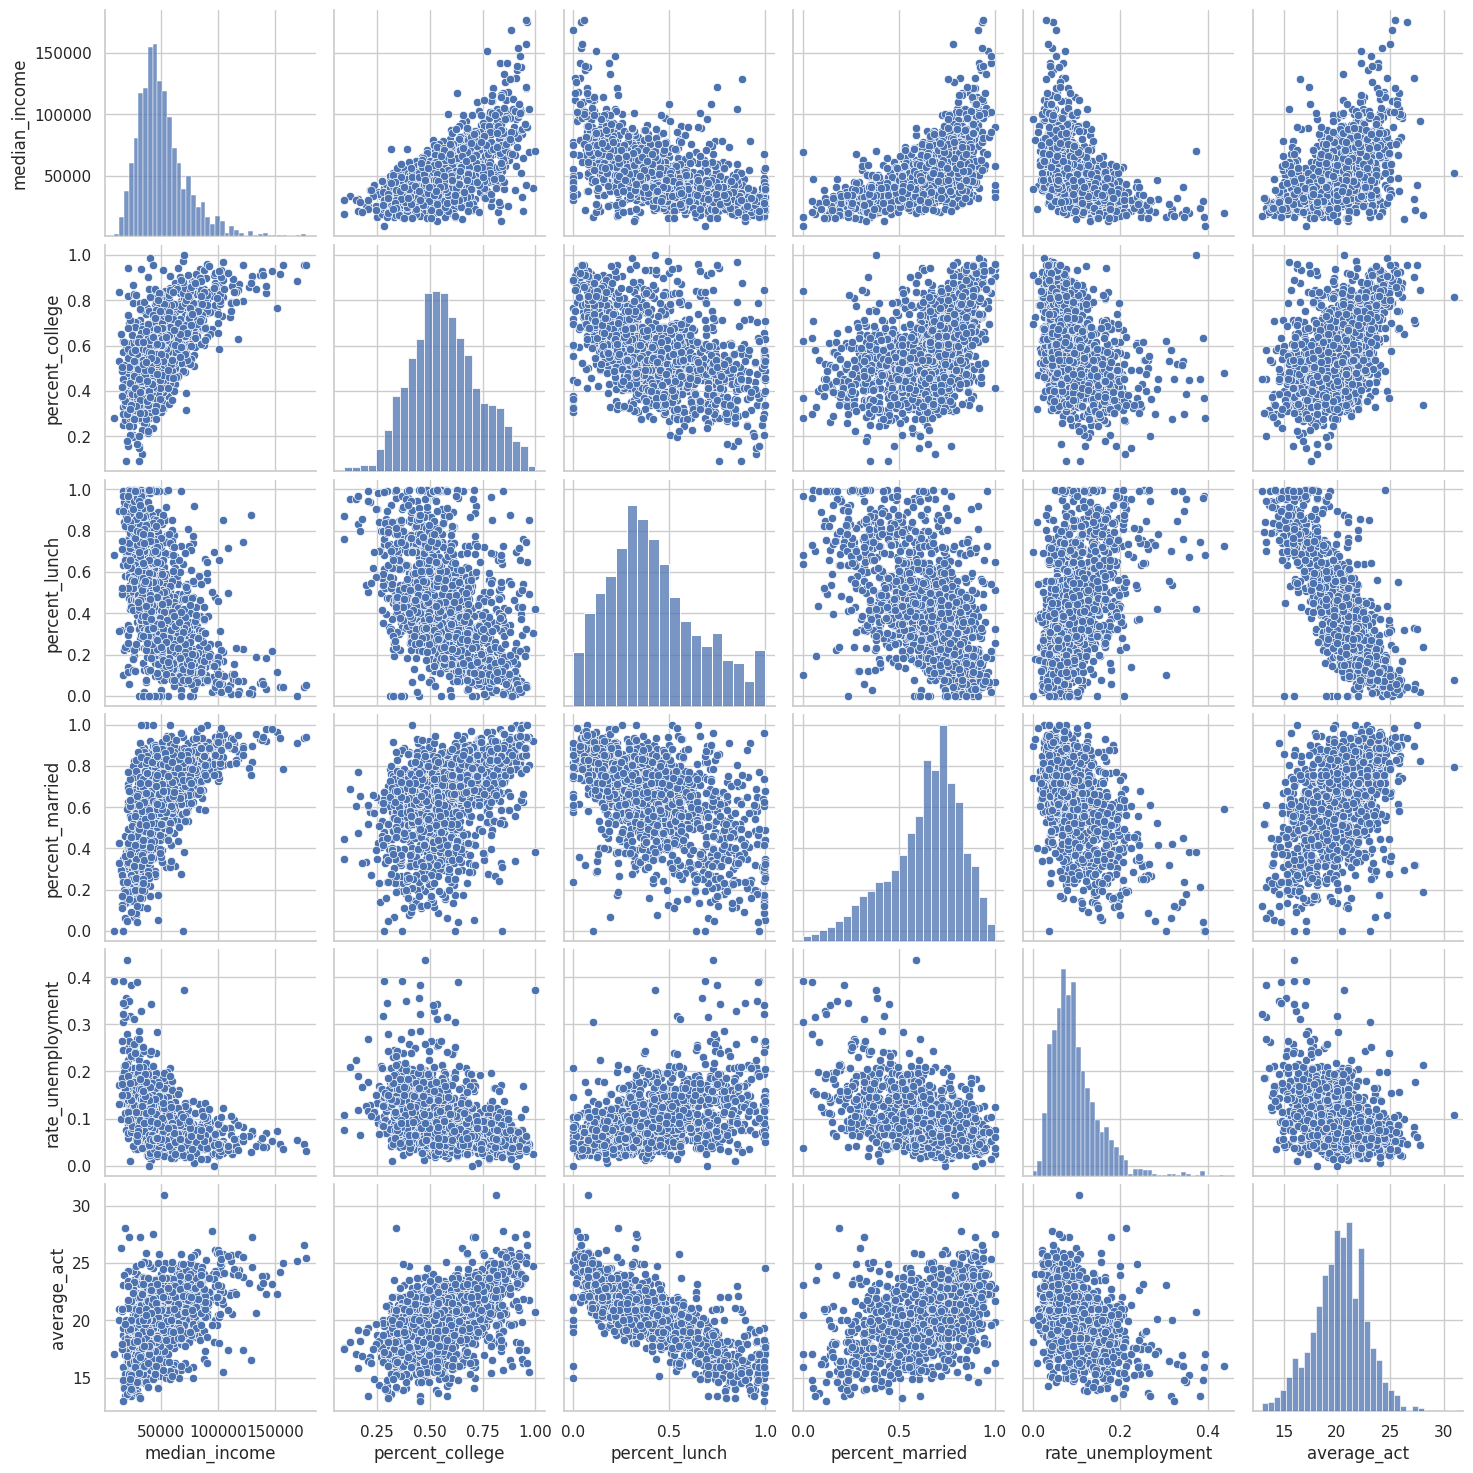

In [5]:
sns.pairplot(data = df.loc[:,['median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment', 'average_act']])

focusing mainly with the row and columns with average_act, we can see 'percent_lunch' has a linear coraltion with average_act, 

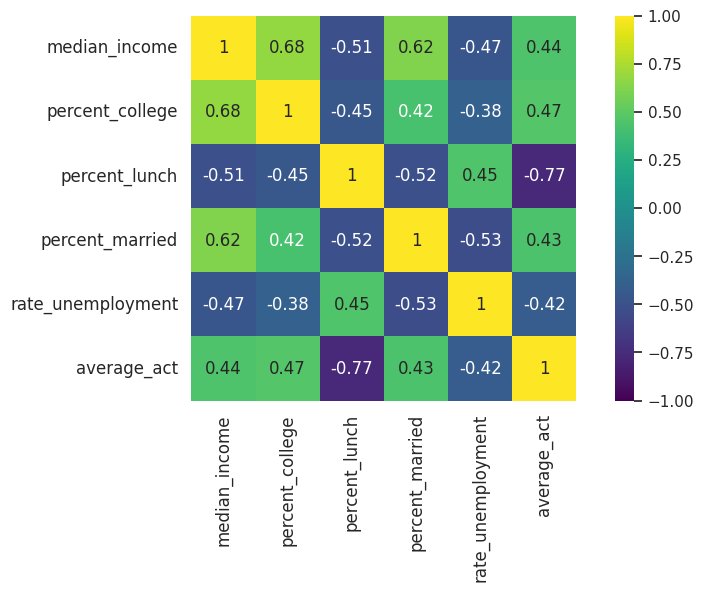

In [6]:
corr_matrix = df.loc[:,['median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment', 'average_act']].corr()

plt.figure(figsize=(10,5))

sns.heatmap(corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap='viridis')

plt.tick_params(labelsize=12);

showing the same thing but with numbers shows us that 'percent_lunch' has the greatest coraltion (pos or neg) with average_act

creating a plot for percent_lunch and average_act

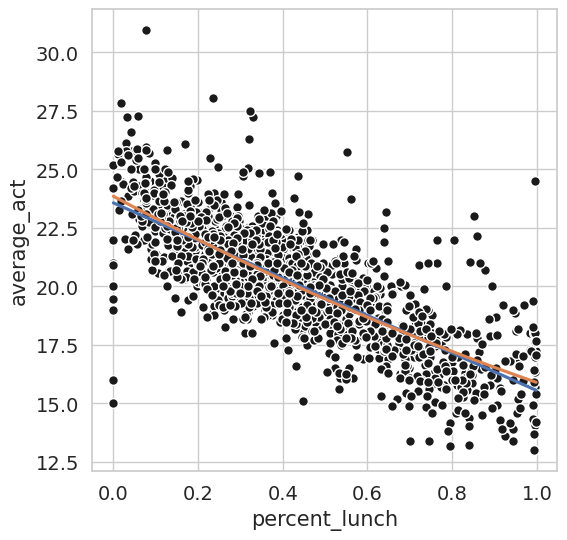

In [7]:
plt.figure(figsize=(6,6))

xs = 'percent_lunch'
ys = 'average_act'

# Scatter plot 
plt.plot(df[xs], df[ys], 'ko', mec ='w', ms=7)

# Add the regression line
sns.regplot(data=df, x = xs, y = ys, order=1, scatter=False, ci=None)
sns.regplot(data=df, x = xs, y = ys, order=2, scatter=False, ci=None)

# Add axis labels
plt.xlabel('percent_lunch', fontsize=15)
plt.ylabel('average_act', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

with this plot we can see how having free lunch, % discounted lunch and paid lunch translate to an ACT score. we can see as a student have more free lunch, the worse average_act they have 

printing a summary to see a simple linear regression model and other statistics  

In [8]:
model = smf.ols(formula='average_act ~ percent_lunch', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     2097.
Date:                Sat, 06 May 2023   Prob (F-statistic):          1.51e-283
Time:                        05:32:19   Log-Likelihood:                -2705.6
No. Observations:                1446   AIC:                             5415.
Df Residuals:                    1444   BIC:                             5426.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.5703      0.084    281.332

here we want to focus on R-squared, adj. R-squared<br/>
we can see that with a single predictor 'percent_lunch' it has a high r-squared meaning high coralation to predicting the average_act.

creating the best subset selection

In [9]:
X = df[['median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment']]
y = df['average_act']
def best_subset_selection(X, y):
    """ This function returns AIC, BIC, and adjusted R-squared values for use in best subset selection.

    Inputs
    ------
    X : array-like, shape (n_samples, n_features)
        Predictor values

    y : array-like, shape (n_samples, )
        Target values

    Returns
    ------
    best_aic : AIC for the best model at each number of possible predictors

    best_bic : BIC for the best model at each number of possible predictors

    best_adjusted_rsquared : adjusted R-squared for the best model at each number of possible predictors

    best_predictors : predictor names for the best model at each number of possible predictors
   
    """

    variable_names = X.columns.values

    number_variables = len(variable_names)

    # Initialize empty arrays to hold the AIC, BIC, and adjusted r-squared for the best model 
    # at each number of predictors
    best_aic = np.zeros(number_variables)
    best_bic = np.zeros(number_variables)
    best_adjusted_rsquared = np.zeros(number_variables)

    # Initialize empty list to hold the names of the best predictors at each number of predictors
    best_predictors = list()

    # Loop over possible numbers of predictors
    for k in range(number_variables):

        # Get the names of all combinations of k+1 predictors
        subset_names = list(combinations(variable_names, k+1))

        # Loop over all models with k+1 predictors
        for n, predictor_names in enumerate(subset_names):

            # Fit the model
            predictors_subset = X.loc[:, predictor_names]

            model = sm.OLS(y, sm.add_constant(predictors_subset)).fit() 

            # Initialize the best values with the first model
            if n == 0:

                best_rsquared_k = model.rsquared
                best_aic_k = model.aic
                best_bic_k = model.bic
                best_adjusted_rsquared_k = model.rsquared_adj
                best_predictors_k = predictor_names

            # If a model has a better r-squared, update the best values
            elif model.rsquared > best_rsquared_k:

                best_rsquared_k = model.rsquared
                best_aic_k = model.aic
                best_bic_k = model.bic
                best_adjusted_rsquared_k = model.rsquared_adj
                best_predictors_k = predictor_names

        # Record the values for the best model at this number of predictors
        best_bic[k] = best_bic_k
        best_aic[k] = best_aic_k
        best_adjusted_rsquared[k] = best_adjusted_rsquared_k
        best_predictors.append(best_predictors_k)

    return best_aic, best_bic, best_adjusted_rsquared, best_predictors

create a function to plot the results

In [10]:
def plot_best_subset_results(best_aic, best_bic, best_adjusted_rsquared, best_predictors):
    """ Plot the best AIC, BIC, and adjusted R-squared values at each number of possible predictors

    Input
    -----
    best_aic : AIC for the best model at each number of possible predictors

    best_bic : BIC for the best model at each number of possible predictors

    best_adjusted_rsquared : adjusted R-squared for the best model at each number of possible predictors

    best_predictors : predictor names for the best model at each number of possible predictors

    """

    number_predictors = np.arange(len(best_aic))+1

    plt.subplots(1,3, figsize=(15,4))
    plt.subplot(1,3,1)
    plt.plot(number_predictors, best_aic, 'b-o')
    plt.plot(number_predictors[np.argmin(best_aic)], np.min(best_aic), 'ro')
    plt.xticks(number_predictors)
    plt.xlabel('Number of predictors', fontsize=18)
    plt.ylabel('AIC', fontsize=18)
    plt.title(best_predictors[np.argmin(best_aic)])

    plt.subplot(1,3,2)
    plt.plot(number_predictors, best_bic, 'b-o')
    plt.plot(number_predictors[np.argmin(best_bic)], np.min(best_bic), 'ro')
    plt.xticks(number_predictors)
    plt.xlabel('Number of predictors', fontsize=18)
    plt.ylabel('BIC', fontsize=18)
    plt.title(best_predictors[np.argmin(best_bic)])

    plt.subplot(1,3,3)
    plt.plot(number_predictors, best_adjusted_rsquared, 'b-o');
    plt.plot(number_predictors[np.argmax(best_adjusted_rsquared)], np.max(best_adjusted_rsquared), 'ro')
    plt.xticks(number_predictors)
    plt.xlabel('Number of predictors', fontsize=18)
    plt.ylabel('Adjusted R-squared', fontsize=18)
    plt.title(best_predictors[np.argmax(best_adjusted_rsquared)])

    plt.subplots_adjust(wspace = 0.3)

doing the best subset

In [11]:
best_aic, best_bic, best_adjusted_rsquared, best_predictors = best_subset_selection(X, y)

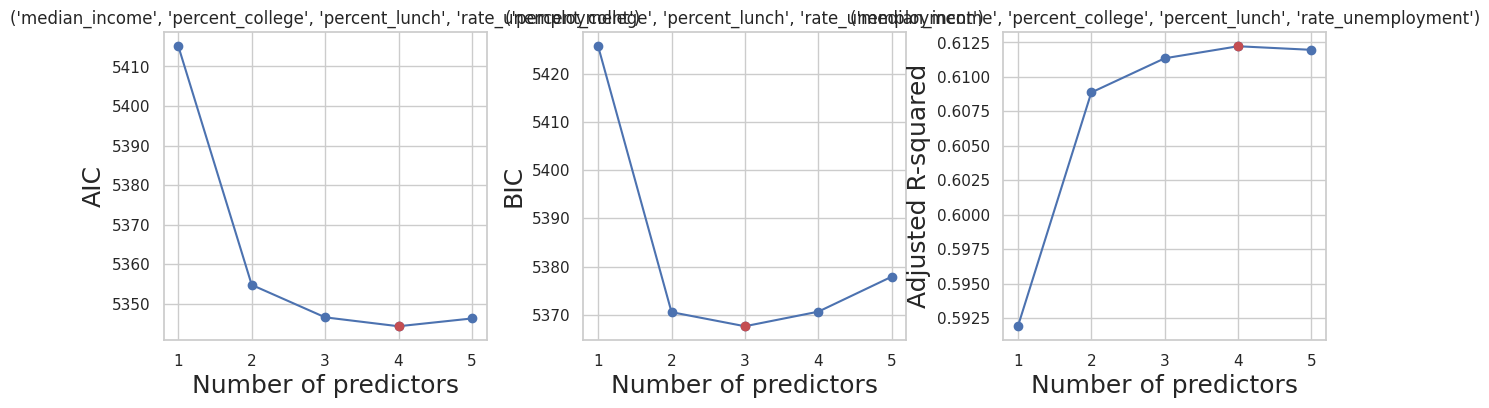

In [12]:
plot_best_subset_results(best_aic, best_bic, best_adjusted_rsquared, best_predictors)

NOTE: lower AIC and BIC means better, highter R-squared means better<br/>
the graph shows what would be the best number of predictors when looking at either AIC, BIC or r^2, with the red dot showing the best number of predictors for AIC, BIC or r^2

showing the best_predictors 

In [13]:
best_predictors

[('percent_lunch',),
 ('percent_college', 'percent_lunch'),
 ('percent_college', 'percent_lunch', 'rate_unemployment'),
 ('median_income', 'percent_college', 'percent_lunch', 'rate_unemployment'),
 ('median_income',
  'percent_college',
  'percent_lunch',
  'percent_married',
  'rate_unemployment')]

this show the best combinations of predicotrs with <br/>
1 predictor = percent_lunch<br/>
2 predictor adds on percent_college<br/>
3 predictors adds on rate_unemployment <br/>
4 predictors adds on median_income <br/>
5 predictors is all of them, adding on percent_married

showing a full prediction model

In [14]:
model = smf.ols(formula='average_act ~ median_income + percent_college + percent_lunch + percent_married + rate_unemployment', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     456.8
Date:                Sat, 06 May 2023   Prob (F-statistic):          5.62e-294
Time:                        05:32:20   Log-Likelihood:                -2667.1
No. Observations:                1446   AIC:                             5346.
Df Residuals:                    1440   BIC:                             5378.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.3912      0.30

with showing a full prediction model, we can see how some of the predictors like median_income and percent_married have an effect with predicting the average_act. looking at P > |t|, it shows us that percent_married and median_income are not significant helping predict the average_act 


creating a plot using the 5 predictors

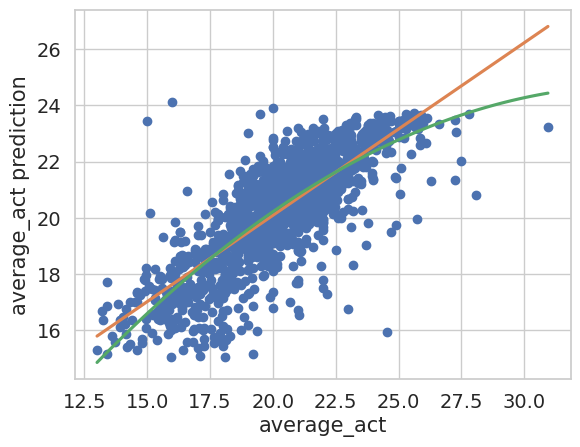

In [15]:
y_prediction = model.predict()
plt.plot(df['average_act'], y_prediction, 'o')


sns.regplot(data=df, x = 'average_act', y = y_prediction, order=1, scatter=False, ci=None)
sns.regplot(data=df, x = 'average_act', y = y_prediction, order=2, scatter=False, ci=None) 

# Add axis labels
plt.xlabel('average_act', fontsize=15)
plt.ylabel('average_act prediction', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

with using 5 predictors, we can see that we can predict the average_act to an extent.

## Conclusion

in conclusion, to answer the questions, <br/>Can we predict average_act from socioeconomic factors? Yes. <br/>
How well can we predict them? we are able to find combinations of predictors that can help more than other conbinations or single predictors. 
<br/>
what is that best model? depending on what we want to base what is best in terms of using AIC, BIC or r^2, the best model for AIC and r^2 would be the 4 subset 'median_income', 'percent_college', 'percent_lunch', 'rate_unemployment' while BIC would use the 3 subset 'percent_college', 'percent_lunch', 'rate_unemployment'